In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
# Sensor noise
r = 200.0

# Prediction error
p_0 = 1.0

# x decay rate
alpha = 0.75

# initial x
x_0 = 1000.0

Text(0.5,1,u'True x')

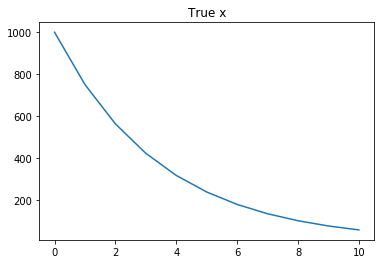

In [31]:
x = [x_0]

for k in range(10):
    x.append(x[k]*alpha)

plt.plot(x)
plt.title('True x')

Text(0.5,1,u'True x + Noise')

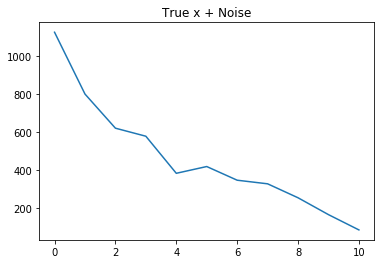

In [32]:
noise = np.random.uniform(0, r, len(x))
z = x + noise

plt.plot(z)
plt.title('True x + Noise')

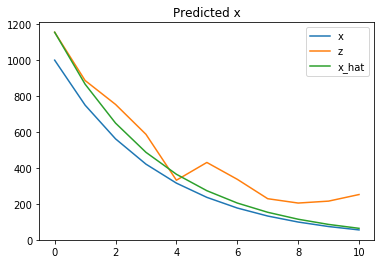

In [30]:
x_hat = [z[0],]
p = [p_0,]
g = [None,]

for k in range(1, len(x)):
    # Predict
    x_hat.append(alpha * x_hat[k-1])
    p.append(alpha * p[k-1] * alpha)
    
    # Update
    g.append(p[k] / (p[k] + r))
    x_hat[k] = x_hat[k] + g[k] * (z[k] - x_hat[k])
    p[k] = (1 - g[k]) * p[k]
    
plt.plot(x, label='x')
plt.plot(z, label='z')
plt.plot(x_hat, label='x_hat')

plt.title('Predicted x')
plt.legend()